In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mping
from PIL import Image
import tensorflow as tf
import seaborn as sns
import time
import numpy as np

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix


In [3]:
!ls "/content/drive/MyDrive/ai ml/Fruit Classification/Train"

Banana	Cherry	Grape  Mango  Peach


In [7]:
!ls "/content/drive/MyDrive/ai ml/Fruit Classification/Test"

Banana	Cherry	Grape  Mango  Peach


In [4]:
!ls "/content/drive/MyDrive/ai ml/Fruit Classification/Train/Cherry"

 0_100.jpg	  '245_100(1).jpg'     r_161_100.jpg	   r2_28_100.jpg
 100_100.jpg	   245_100.jpg	      'r_162_100(1).jpg'  'r_229_100(1).jpg'
'10_100(1).jpg'   '246_100(1).jpg'     r_162_100.jpg	   r_229_100.jpg
 10_100.jpg	   246_100.jpg	      'r_163_100(1).jpg'   r2_29_100.jpg
 101_100.jpg	  '247_100(1).jpg'     r_163_100.jpg	  'r_230_100(1).jpg'
 102_100.jpg	   247_100.jpg	      'r_164_100(1).jpg'   r_230_100.jpg
 103_100.jpg	  '248_100(1).jpg'     r_164_100.jpg	   r2_30_100.jpg
 104_100.jpg	   248_100.jpg	      'r_165_100(1).jpg'   r2_304_100.jpg
'105_100(1).jpg'  '249_100(1).jpg'     r_165_100.jpg	   r2_305_100.jpg
 105_100.jpg	   249_100.jpg	      'r_166_100(1).jpg'   r2_306_100.jpg
'106_100(1).jpg'  '250_100(1).jpg'     r_166_100.jpg	   r2_307_100.jpg
 106_100.jpg	   250_100.jpg	      'r_167_100(1).jpg'   r2_308_100.jpg
'107_100(1).jpg'   25_100.jpg	       r_167_100.jpg	   r2_309_100.jpg
 107_100.jpg	  '251_100(1).jpg'    'r_168_100(1).jpg'  'r_23_100(1).jpg'
'108_100(1).jpg'   251_

In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img

# Define augmentation generator
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Number of augmented images to create per original image
NUM_AUGMENT = 10

for fruit_class in os.listdir(test_dir):
    class_path = os.path.join(test_dir, fruit_class)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    for image_file in images:
        img_path = os.path.join(class_path, image_file)
        image = load_img(img_path)
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)  # reshape for the generator

        # Generate augmented images
        i = 0
        for batch in augmentor.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= NUM_AUGMENT:
                break


In [5]:
train_dir = "/content/drive/MyDrive/ai ml/Fruit Classification/Train"
test_dir = "/content/drive/MyDrive/ai ml/Fruit Classification/Test"

In [9]:
#To store corrupted image path
corrupted_images = []

#iterating through each folder
for class_name in sorted(os.listdir(train_dir)):
  class_path = os.path.join(train_dir, class_name)

  #Ensuring its a directory
  if os.path.isdir(class_path):
    for Image_name in os.listdir(class_path):
      image_path = os.path.join(class_path, Image_name)

      #Checking for corrupted images
      try:
        with Image.open(image_path) as img:
          img.verify()
      except (IOError, SyntaxError):
        corrupted_images.append(image_path)
        os.remove(image_path)
        print(f"Removed corrupted image:  {image_path}")

# printing summary
if not corrupted_images:
  print("No corrupted images found")

No corrupted images found


In [10]:
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

selected_images = []
selected_labels = []
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png','jpg','jpeg'))]
    #Ensuring the class forlder is not empty
    if images:
      selected_image = os.path.join(class_path, random.choice(images))
      selected_images.append(selected_image)
      selected_labels.append(class_name)

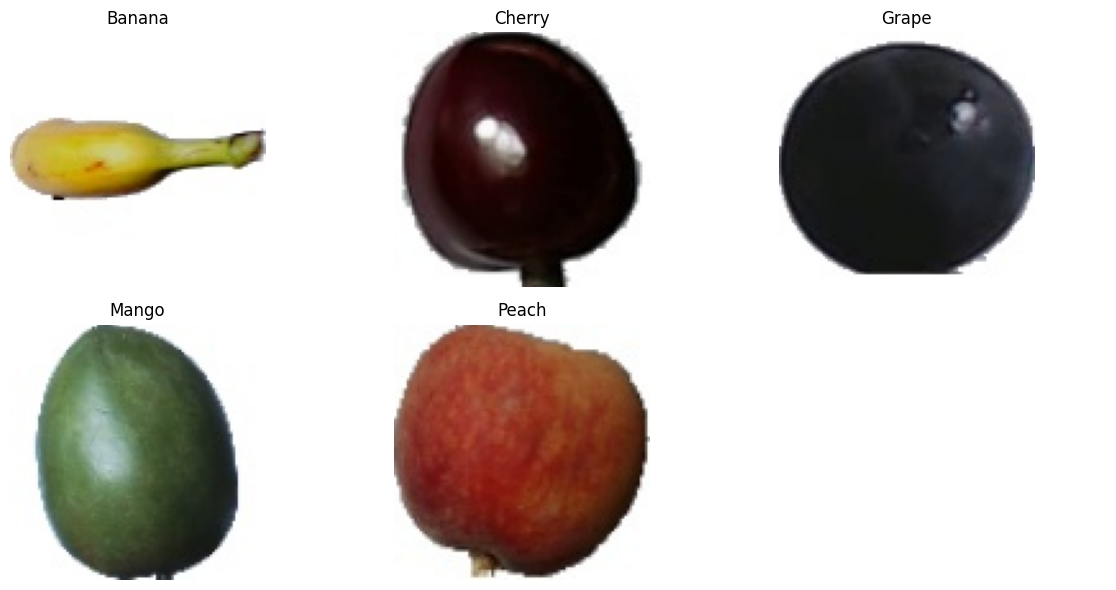

In [11]:
num_classes = len(selected_images)
cols = (num_classes + 1)//2 #this line determines the column
rows = 2 #fixed row for layout
fig, axes = plt.subplots(rows, cols, figsize = (12,6))
for i, ax in enumerate(axes.flat):
  if i<num_classes:
    img = mping.imread(selected_images[i])
    ax.imshow(img)
    ax.set_title(selected_labels[i])
    ax.axis('off')
  else:
    ax.axis("off")
    plt.tight_layout()
    plt.show()


Class Distribution:
class Name               Valid Image connt
Banana                              1423
Cherry                              1222
Grape                               1468
Mango                                908
Peach                               1222
Total number of images: 6243


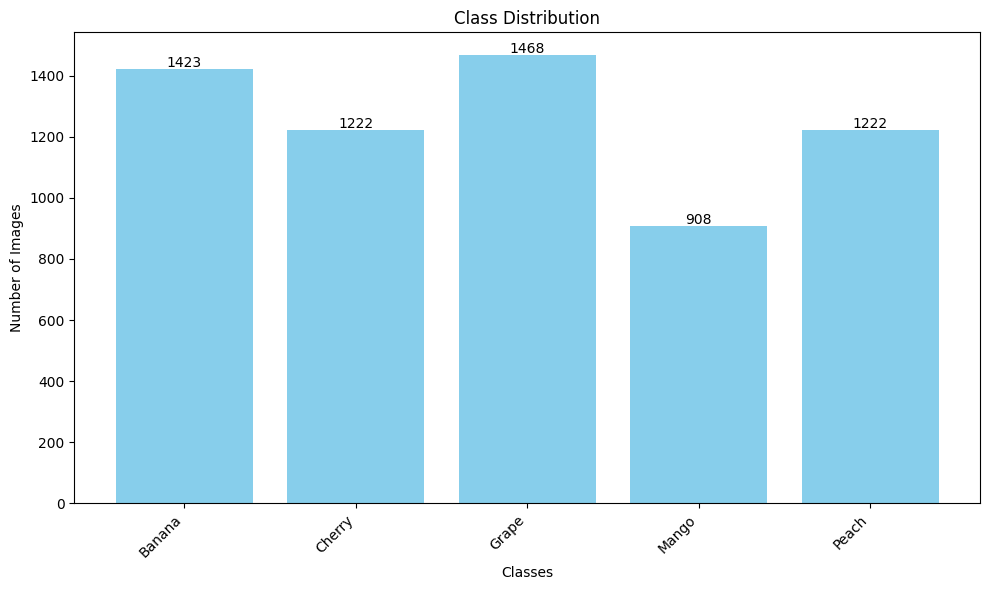

In [12]:
# showing the count of class
class_counts = {}
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  if os.path.isdir(class_path):
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
  class_counts[class_name] = len(images)

  #print class balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'class Name':<25}{'Valid Image connt':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
  print(f"{class_name:<25}{count:>15}")
print("=" *45)
total_images = sum(class_counts.values())
print(f"Total number of images: {total_images}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(class_counts.values()):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()
plt.show()

In [13]:
#setting image dimentions and batch size
img_height, img_width = 128,128
batch_size = 32
validation_split = 0.2
seed = 123

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "training",
    seed =123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = "int"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = "int"
)

train_ds = train_ds.prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size = tf.data.AUTOTUNE)


Found 6243 files belonging to 5 classes.
Using 4995 files for training.
Found 6243 files belonging to 5 classes.
Using 1248 files for validation.


In [15]:
# Verify the contents of the test directory
!ls "/content/drive/MyDrive/ai ml/Fruit Classification/Test"

Banana	Cherry	Grape  Mango  Peach


In [16]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = "int",
    shuffle = False
)

test_ds = test_ds.prefetch(buffer_size = tf.data.AUTOTUNE)



Found 55 files belonging to 5 classes.


In [17]:
# Augmentating data
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomContrast(0.2),
], name = "data_augmentation")

rescale = layers.Rescaling(1./255)

In [18]:
# Apply augmentation + rescale to training set
train_ds = train_ds.map(lambda x, y: (rescale(data_augmentation(x, training=True)), y))

# Apply only rescale to validation set
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Prefetch (performance optimization)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)



test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

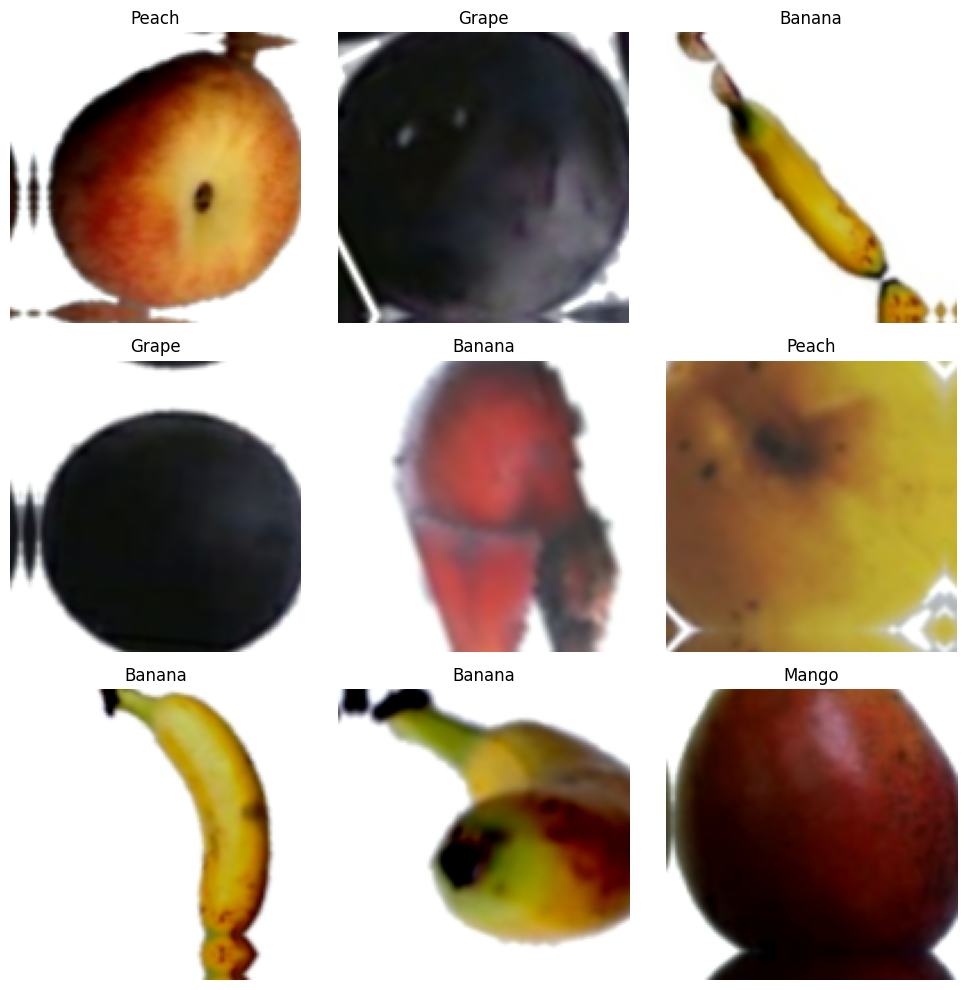

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):
        img = images[i].numpy()
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


#Baseline CNN model

In [20]:
# Define the baseline CNN model function
def create_baseline_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        # Input layer
        layers.Input(shape=input_shape),


        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1'),
        layers.MaxPooling2D((2, 2), name='pool1'),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
        layers.MaxPooling2D((2, 2), name='pool2'),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
        layers.MaxPooling2D((2, 2), name='pool3'),

        # Flatten layer
        layers.Flatten(name='flatten'),

        # Three Fully Connected Layers
        layers.Dense(512, activation='relu', name='dense1'),
        layers.Dense(256, activation='relu', name='dense2'),
        layers.Dense(128, activation='relu', name='dense3'),

        # Output layer
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create the baseline model
input_shape = (img_height, img_width, 3)
baseline_model = create_baseline_model(input_shape, num_classes)

# Print model summary
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,035,845 (64.99 MB)

 Trainable params: 17,035,845 (64.99 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the baseline model

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
import time

# Compile the model
baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',          # Can also use 'val_accuracy'
    patience=2,                  # Stop after 2 epochs with no improvement
    restore_best_weights=True,  # Use weights from best epoch
    verbose=1
)

# Train the baseline model with EarlyStopping
start_time_baseline = time.time()

history_baseline = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=7,
    verbose=1,
    callbacks=[early_stop]
)

baseline_training_time = time.time() - start_time_baseline
print(f"Training time for baseline model: {baseline_training_time:.2f} seconds")


Epoch 1/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - accuracy: 0.9866 - loss: 0.0471 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 2/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 99s 379ms/step - accuracy: 0.9959 - loss: 0.0222 - val_accuracy: 0.9968 - val_loss: 0.0189
Epoch 3/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 283ms/step - accuracy: 0.9829 - loss: 0.0706 - val_accuracy: 1.0000 - val_loss: 5.9091e-04
Epoch 4/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 5/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.9909 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 1.4082e-04
Epoch 6/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9946 - loss: 0.0217 - val_accuracy: 0.9968 - val_loss: 0.0070
Epoch 7/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 378ms/step - accuracy: 0.9961 - loss: 0.0075 - val_accuracy: 0.9968 - val_loss: 0.0136
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 5.

In [31]:
import pickle
baseline_model.save('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_baseline_model.h5')


with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_baseline.pkl', 'wb') as f:
    pickle.dump(history_baseline.history, f)


#Loading the model and history

In [32]:
from tensorflow.keras.models import load_model
import pickle

# Load trained baseline model
baseline_model = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_baseline_model.h5')

# Compile it for evaluation (required)
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load saved history
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_baseline.pkl', 'rb') as f:
    history_data = pickle.load(f)

# Wrap history dict in a mock object to use .history format
class History:
    def __init__(self, history):
        self.history = history

history_baseline = History(history_data)


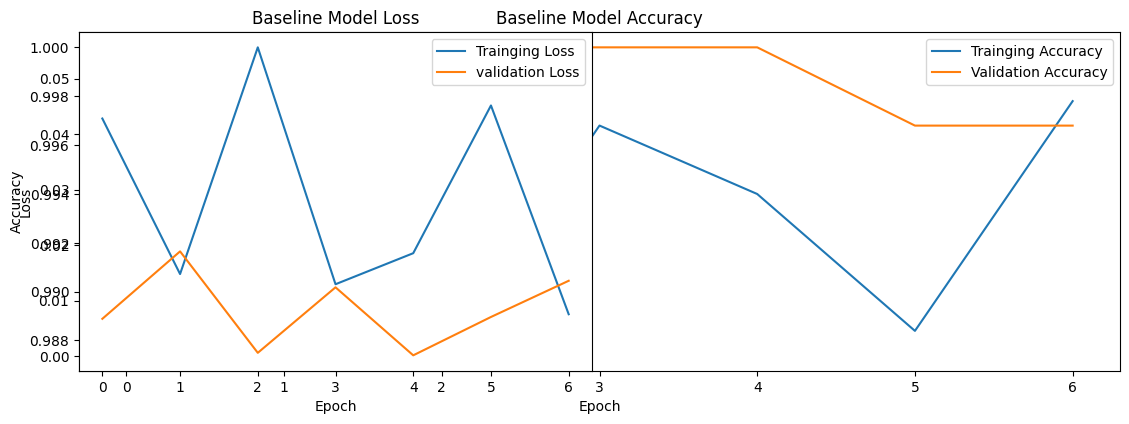

Best validation accuracy:  1.0000 at epoch 1


In [33]:
plt.figure(figsize = (12,5))

#plotting accuracy
plt.plot(history_baseline.history['accuracy'], label = 'Trainging Accuracy')
plt.plot(history_baseline.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plotting Loss
plt.subplot(1,2,1)
plt.plot(history_baseline.history['loss'], label = 'Trainging Loss')
plt.plot(history_baseline.history['val_loss'], label = 'validation Loss')
plt.title('Baseline Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#getting the best validation accuracy
best_val_acc = max(history_baseline.history['val_accuracy'])
best_epoch = history_baseline.history['val_accuracy'].index(best_val_acc)+1
print(f"Best validation accuracy: {best_val_acc: .4f} at epoch {best_epoch}")

Evaluating baseline Model on Test set

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 1.0000 - loss: 0.0013    

✅ Test Accuracy: 1.0000
❌ Test Loss: 0.0018
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step

🔍 Test Set Class Distribution:
Banana: 11
Cherry: 11
Grape: 11
Mango: 11
Peach: 11

📊 Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        11
      Cherry       1.00      1.00      1.00        11
       Grape       1.00      1.00      1.00        11
       Mango       1.00      1.00      1.00        11
       Peach       1.00      1.00      1.00        11

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



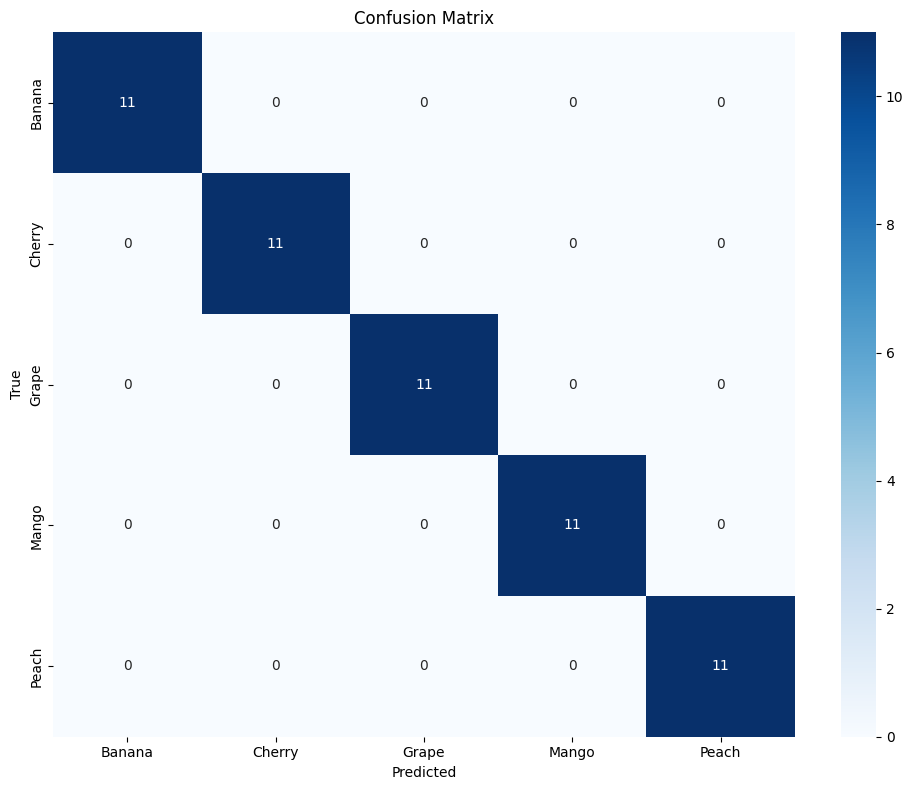

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluate
# Use the 'baseline_model' variable which holds the compiled model object
test_loss, test_acc = baseline_model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

# Predictions
# Use the 'baseline_model' variable for predictions as well
y_pred_probs = baseline_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Check label distribution in test set
y_true = tf.concat([label for _, label in test_ds], axis=0).numpy()
print("\n🔍 Test Set Class Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {(y_true == i).sum()}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Visualizing sample prediction from baseline model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


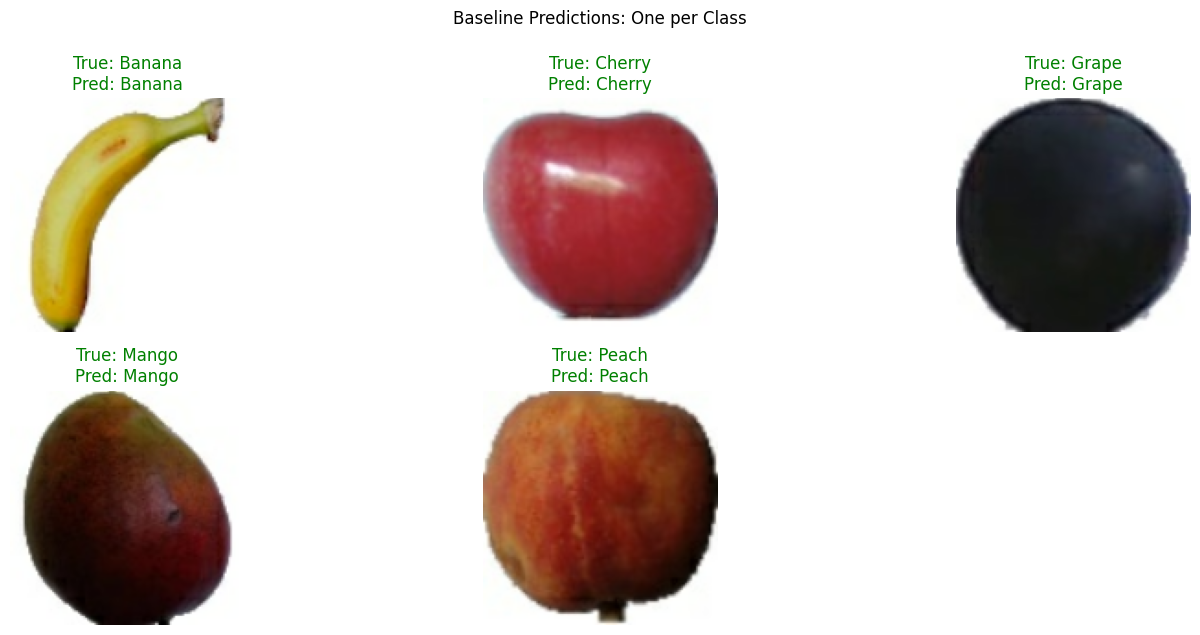

In [35]:
def plot_one_prediction_per_class(model, ds, class_names):
    num_classes = len(class_names)
    shown_classes = set()

    plt.figure(figsize=(15, 6))

    i = 0
    for images, labels in ds.unbatch().batch(1):  # Go one image at a time
        true_label = labels.numpy()[0]

        if true_label in shown_classes:
            continue

        predictions = model.predict(images)
        predicted_label = np.argmax(predictions[0])

        ax = plt.subplot(2, (num_classes + 1) // 2, i + 1)
        plt.imshow(np.clip(images[0].numpy(), 0, 1))  # Show float image correctly
        color = "green" if predicted_label == true_label else "red"
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}", color=color)
        plt.axis("off")

        shown_classes.add(true_label)
        i += 1

        if len(shown_classes) == num_classes:
            break

    plt.tight_layout()
    plt.suptitle("Baseline Predictions: One per Class", y=1.05)
    plt.show()

plot_one_prediction_per_class(baseline_model, test_ds, class_names)


#Exercise 3.1.3


Creating deeper CNN model With Regularization

In [36]:
input_shape = (128,128,3)

def create_deeper_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),

        # 1st Conv Block
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # 2nd Conv Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # 3rd Conv Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # 4th Conv Block
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Use GAP instead of Flatten
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


deeper_model = create_deeper_model(input_shape, num_classes)
deeper_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 588,229 (2.24 MB)

 Trainable params: 587,269 (2.24 MB)

 Non-trainable params: 960 (3.75 KB)

Compiling and Optimizing using adam

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

deeper_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

history = deeper_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 277ms/step - accuracy: 0.8515 - loss: 0.4719 - val_accuracy: 0.2043 - val_loss: 2.2441 - learning_rate: 3.0000e-04
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.9782 - loss: 0.1146 - val_accuracy: 0.4655 - val_loss: 1.7317 - learning_rate: 3.0000e-04
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.9813 - loss: 0.1189 - val_accuracy: 0.6643 - val_loss: 1.1674 - learning_rate: 3.0000e-04
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - accuracy: 0.9857 - loss: 0.0966 - val_accuracy: 1.0000 - val_loss: 0.0625 - learning_rate: 3.0000e-04
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 250ms/step - accuracy: 0.9899 - loss: 0.0844 - val_accuracy: 0.9856 - val_loss: 0.1185 - learning_rate: 3.0000e-04
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.9847 - loss: 0.0944 - val_accuracy: 0.7997 - val_loss: 0.7677 - learning_rate: 3.0000e-04
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 25

In [42]:
import pickle

# Save the trained deeper model
deeper_model.save('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model.h5')

# Save the training history (from the deeper model)
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_deeper.pkl', 'wb') as f:
    pickle.dump(history.history, f)


LOADING THE TRAINED MODEL AND ITS HISTORY

In [43]:
import pickle

# Load saved history
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_deeper.pkl', 'rb') as f:
    history_data = pickle.load(f)

# Wrap in mock object for compatibility
class History:
    def __init__(self, history):
        self.history = history

history_deeper = History(history_data)


Visualizing deeper model with training data

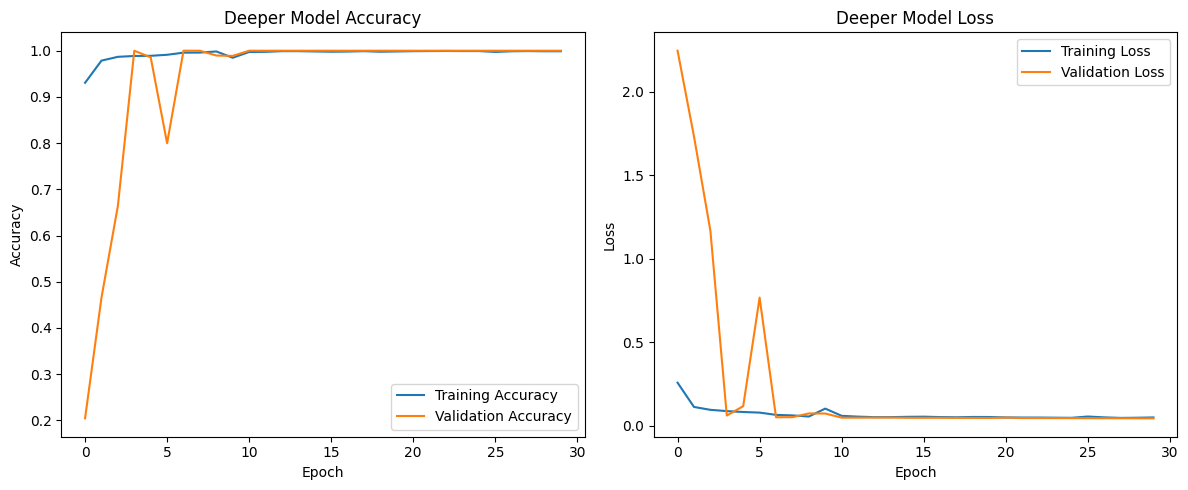

Best validation accuracy: 1.0000 at epoch 4


In [44]:
# Plot training history for deeper model
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['accuracy'], label='Training Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deeper Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['loss'], label='Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Validation Loss')
plt.title('Deeper Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Best validation accuracy
best_val_acc = max(history_deeper.history['val_accuracy'])
best_epoch = history_deeper.history['val_accuracy'].index(best_val_acc) + 1
print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")


Evluating deeper model on test set

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step

📈 Classification Report (Deeper Model):
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        11
      Cherry       1.00      1.00      1.00        11
       Grape       1.00      1.00      1.00        11
       Mango       1.00      1.00      1.00        11
       Peach       1.00      1.00      1.00        11

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



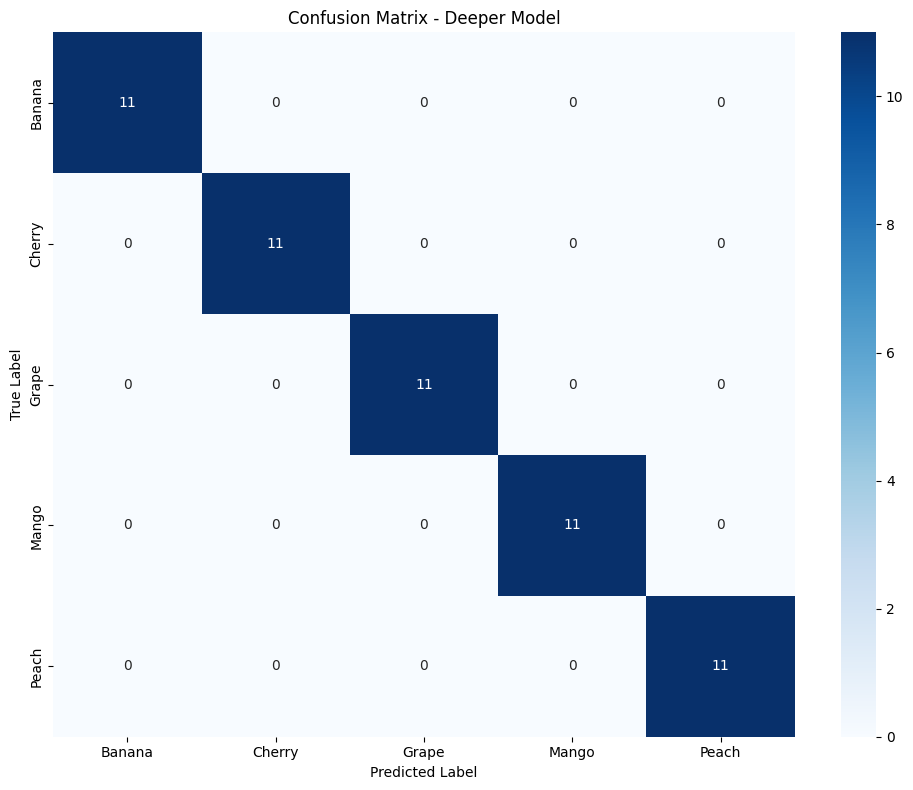


🔍 Visualizing predictions for class: Banana


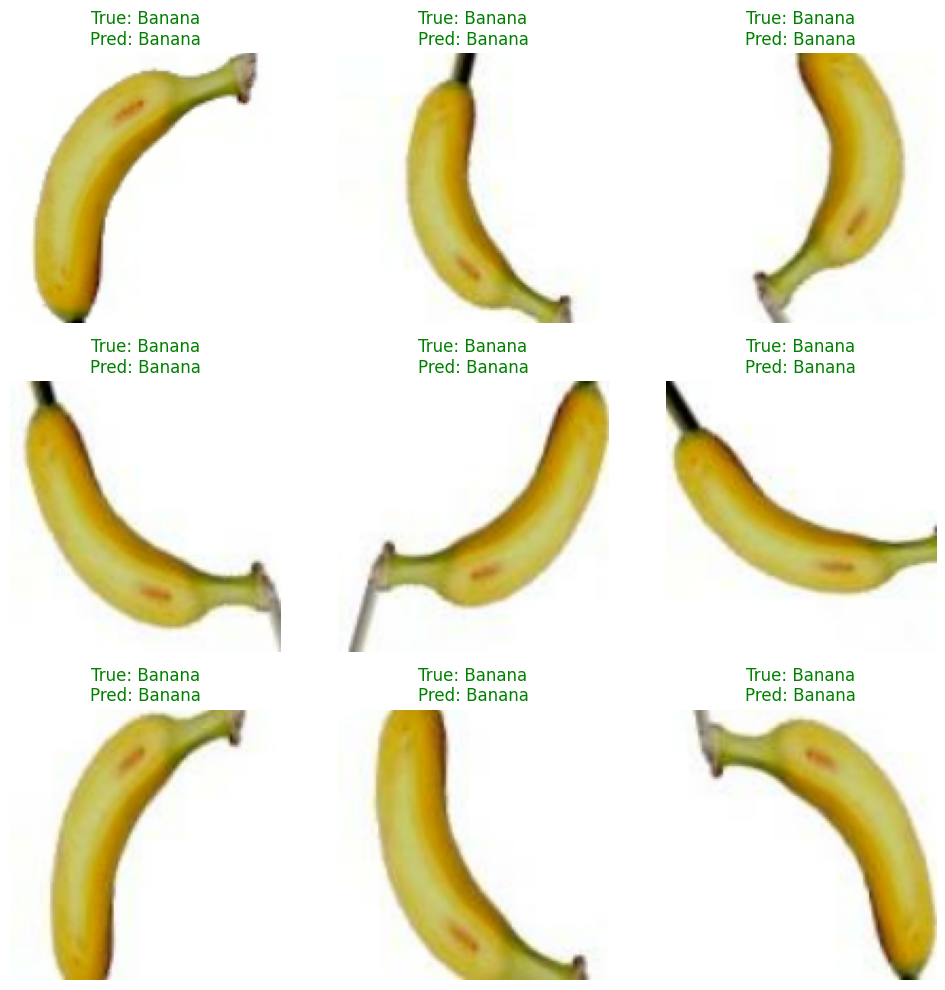


🔍 Visualizing predictions for class: Cherry


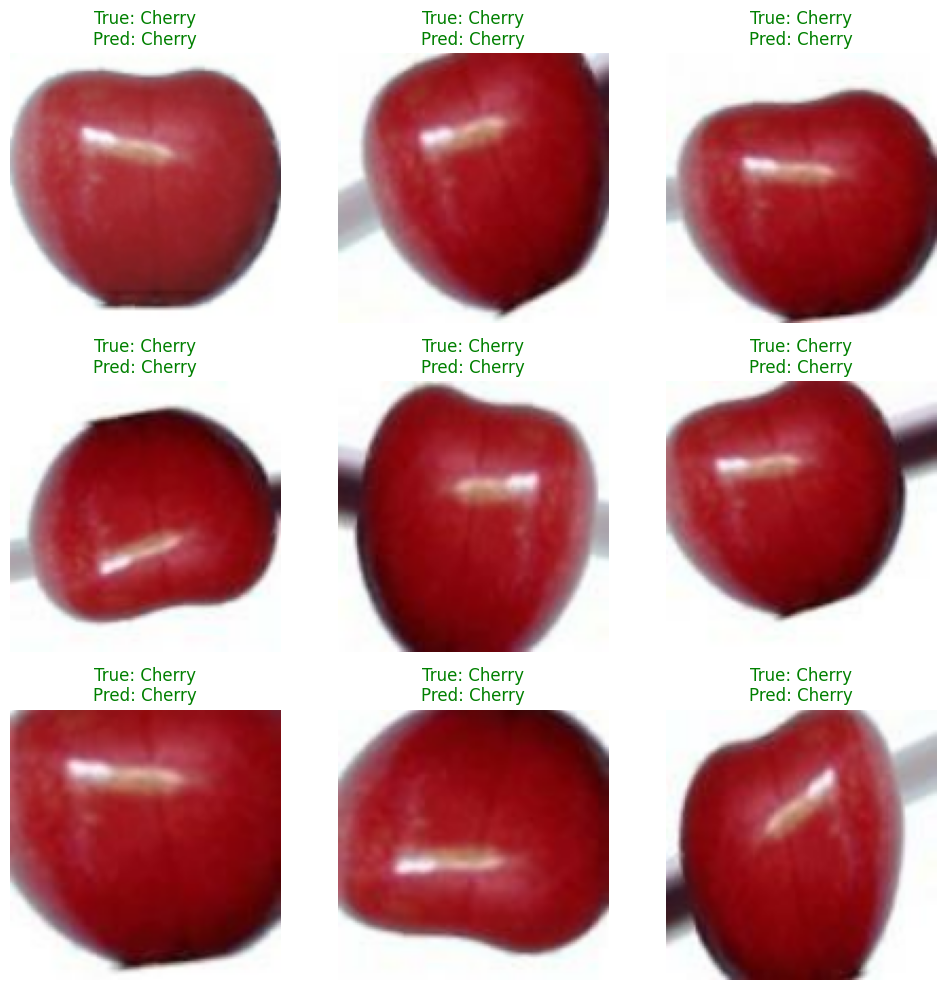


🔍 Visualizing predictions for class: Grape


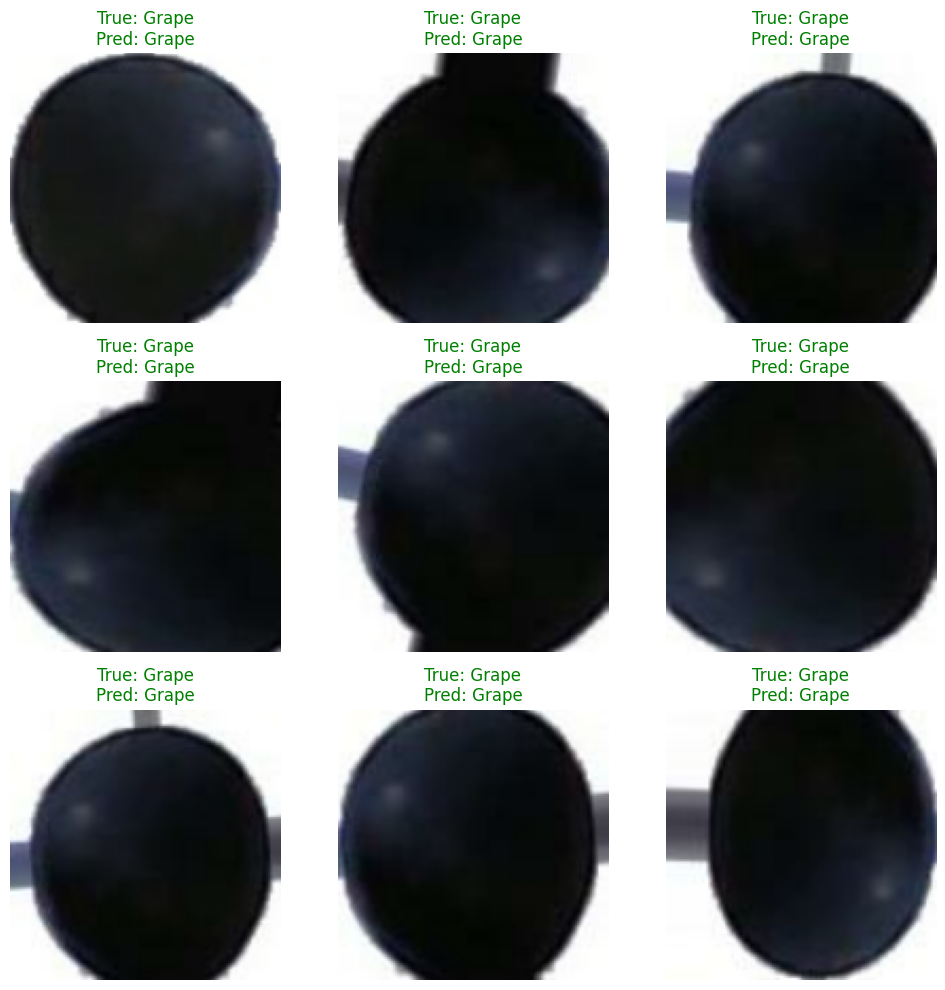


🔍 Visualizing predictions for class: Mango


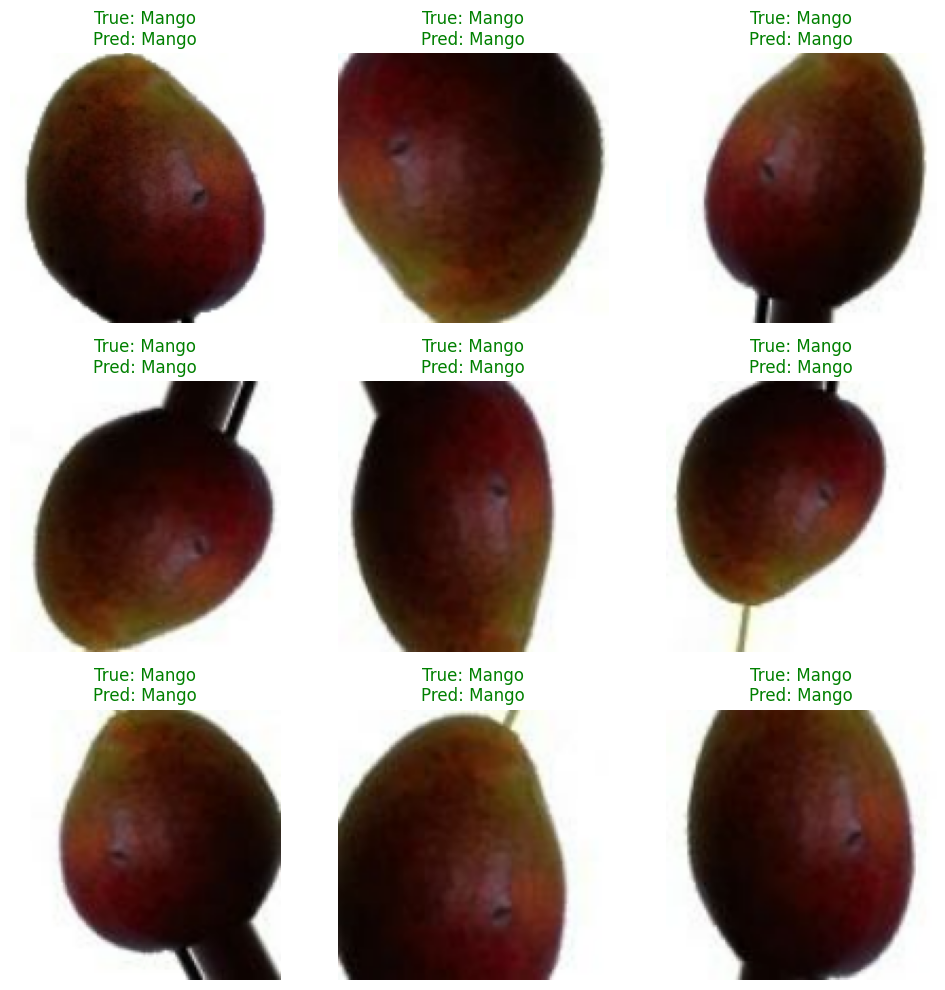


🔍 Visualizing predictions for class: Peach


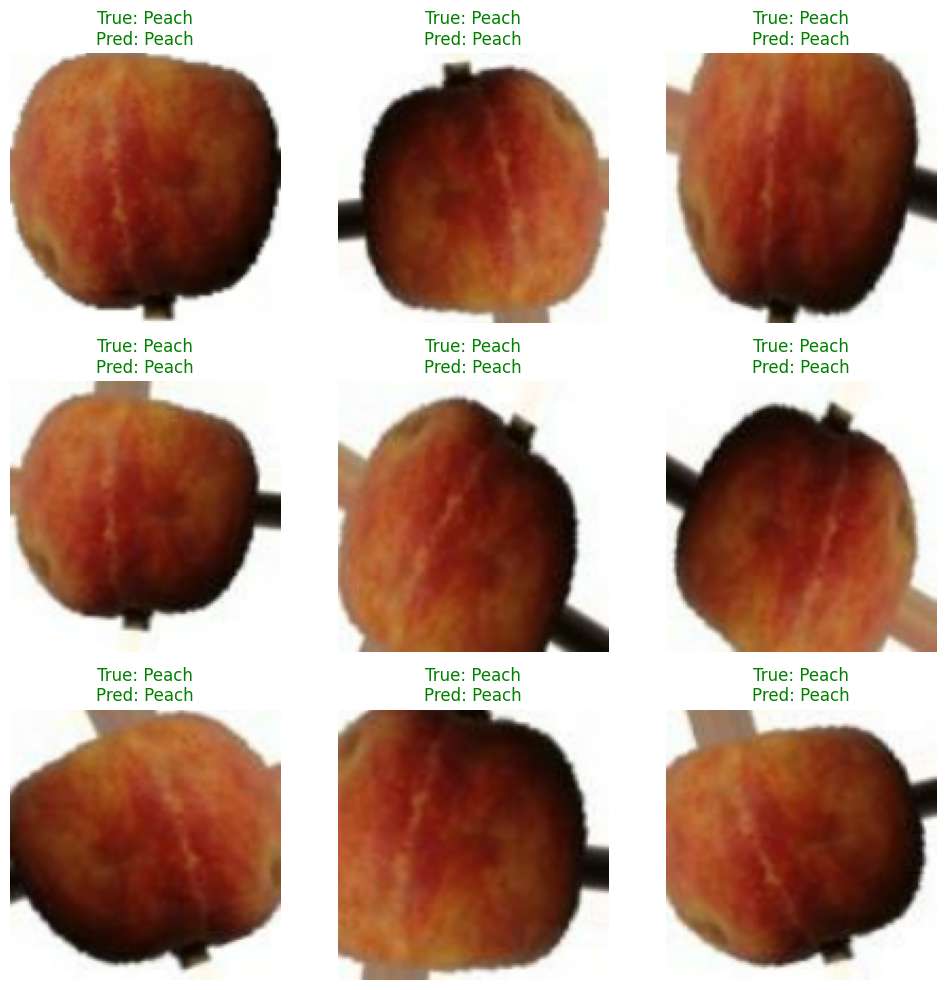

In [45]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Load pre-trained model (NO compile needed)
deeper_model
# ✅ Recompile for evaluation & prediction (won't affect weights)
deeper_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# 🔮 Generate predictions
deeper_predictions = deeper_model.predict(test_ds)
deeper_y_pred = np.argmax(deeper_predictions, axis=1)

# 🧾 Rebuild true labels from test dataset
true_labels = tf.concat([label for _, label in test_ds], axis=0).numpy()

# 📊 Classification Report
print("\n📈 Classification Report (Deeper Model):")
print(classification_report(true_labels, deeper_y_pred, target_names=class_names))

# 🔁 Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_labels, deeper_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Deeper Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
def plot_class_samples(model, dataset, class_names, target_class, num_images=9):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    class_index = class_names.index(target_class)
    count = 0

    for images, labels in dataset.unbatch():
        if count >= num_images:
            break
        if labels.numpy() == class_index:
            # Predict
            prediction = model.predict(tf.expand_dims(images, 0), verbose=0)
            predicted_label = np.argmax(prediction)
            predicted_class = class_names[predicted_label]

            # Image rendering
            ax = plt.subplot(3, 3, count + 1)
            plt.imshow((images.numpy() * 255).astype("uint8"))
            plt.axis("off")

            # Color code based on correctness
            if predicted_label == class_index:
                color = 'green'
            else:
                color = 'red'

            plt.title(f"True: {target_class}\nPred: {predicted_class}", color=color)
            count += 1

    plt.tight_layout()
    plt.show()


# Visualize sample predictions (ensure this function is defined)
for class_name in class_names:
    print(f"\n🔍 Visualizing predictions for class: {class_name}")
    plot_class_samples(deeper_model, test_ds, class_names, target_class=class_name)



Now to train deeper model using SGD optimizer


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

# Define input shape and number of classes
input_shape = (128, 128, 3)
num_classes = len(class_names)

# Create a new instance of the deeper model
deeper_model_sgd = create_deeper_model(input_shape, num_classes)

# Compile with SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
deeper_model_sgd.compile(
    optimizer=sgd_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 🌟 Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # Reduce LR by 20%
    patience=2,         # If no improvement in 2 epochs
    min_lr=1e-6,        # Minimum LR threshold
    verbose=1
)

# ⏱️ Train the model with callbacks
start_time_sgd = time.time()

history_sgd = deeper_model_sgd.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

sgd_training_time = time.time() - start_time_sgd
print(f"Training time with SGD + EarlyStopping + ReduceLROnPlateau: {sgd_training_time:.2f} seconds")


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 284ms/step - accuracy: 0.8527 - loss: 0.4644 - val_accuracy: 0.4527 - val_loss: 1.2483 - learning_rate: 0.0100
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 267ms/step - accuracy: 0.9788 - loss: 0.1223 - val_accuracy: 0.7107 - val_loss: 1.2603 - learning_rate: 0.0100
Epoch 3/20
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9686 - loss: 0.1455
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9688 - loss: 0.1452 - val_accuracy: 0.7059 - val_loss: 2.8072 - learning_rate: 0.0100
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.9663 - loss: 0.1694 - val_accuracy: 1.0000 - val_loss: 0.0607 - learning_rate: 0.0020
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 270ms/step - accuracy: 0.9892 - loss: 0.0864 - val_accuracy: 1.0000 - val_loss: 0.0579 - learning_rate: 0.0020
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 260ms/step - accuracy: 0.988

In [47]:
import pickle

# Save the SGD-trained model
deeper_model_sgd.save('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model_sgd.h5')

# Save the training history
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_sgd.pkl', 'wb') as f:
    pickle.dump(history_sgd.history, f)


In [48]:
import pickle
from tensorflow.keras.models import load_model
import tensorflow as tf

# --- Load and compile model for evaluation ---
deeper_model_sgd = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model_sgd.h5')

deeper_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# --- Load training history from pickle ---
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_sgd.pkl', 'rb') as f:
    history_data = pickle.load(f)

# --- Wrap in mock object ---
class History:
    def __init__(self, history):
        self.history = history

history_deeper = History(history_data)


#Comparing baseline model to deeper model optimized by adam and SGD

In [93]:
# ---------- Load models ----------
baseline_model = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_baseline_model.h5')
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

deeper_model = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model.h5')
deeper_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

deeper_model_sgd = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model_sgd.h5')
deeper_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                         loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# After loading from pickle
with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_baseline.pkl', 'rb') as f:
    history_baseline_data = pickle.load(f)

with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_deeper.pkl', 'rb') as f:
    history_deeper_data = pickle.load(f)

with open('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_history_sgd.pkl', 'rb') as f:
    history_sgd_data = pickle.load(f)

# Wrap them properly
class History:
    def __init__(self, history):
        self.history = history

history_baseline = History(history_baseline_data)
history_deeper = History(history_deeper_data)
history_sgd = History(history_sgd_data)

# Set this alias for plotting Adam vs SGD
history = history_deeper

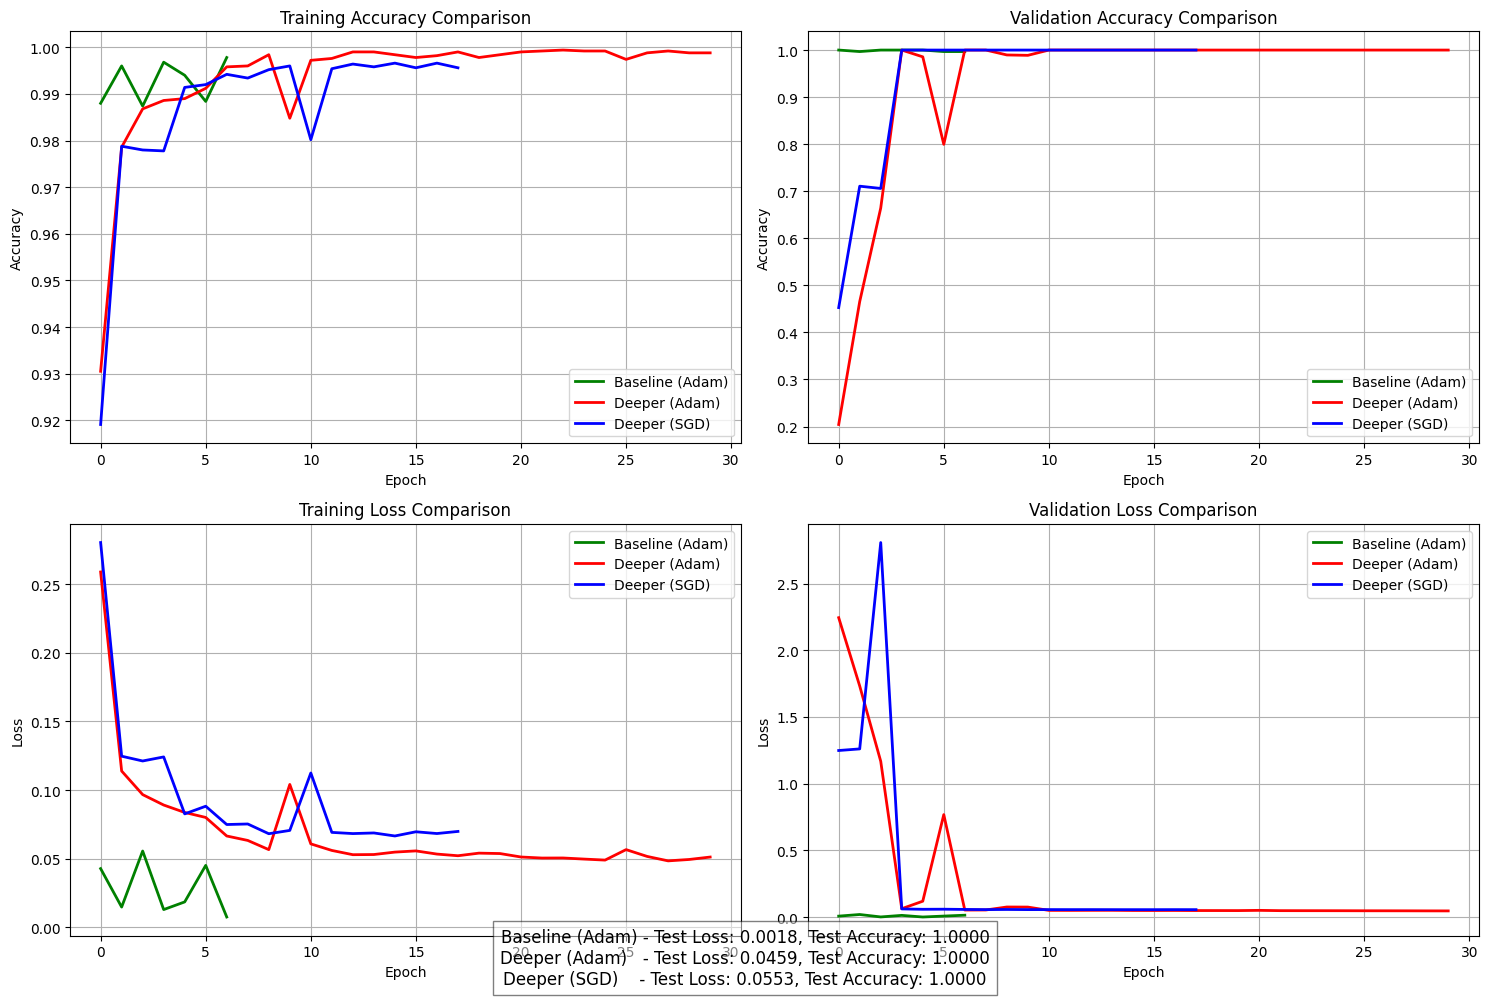

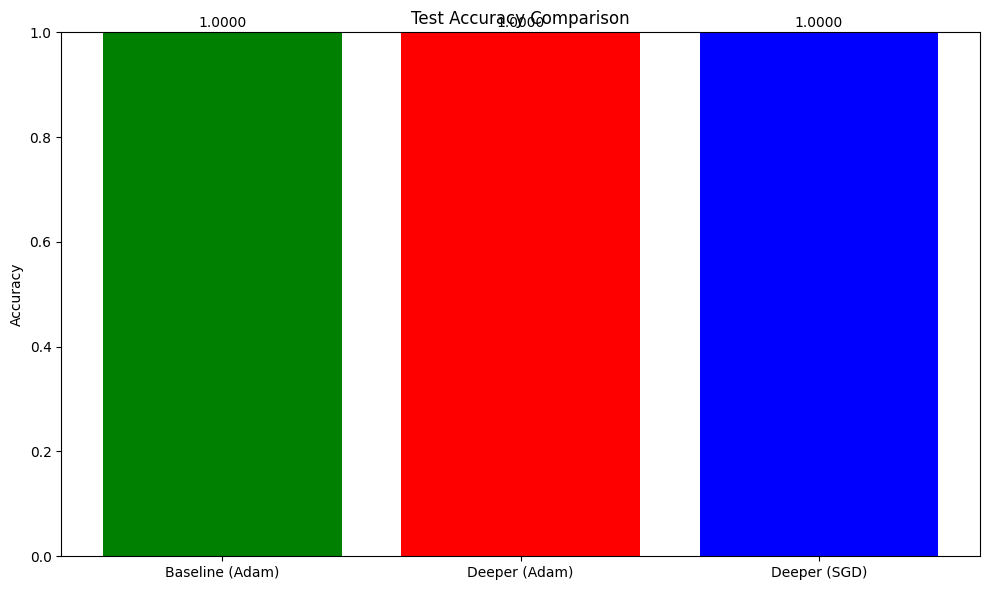

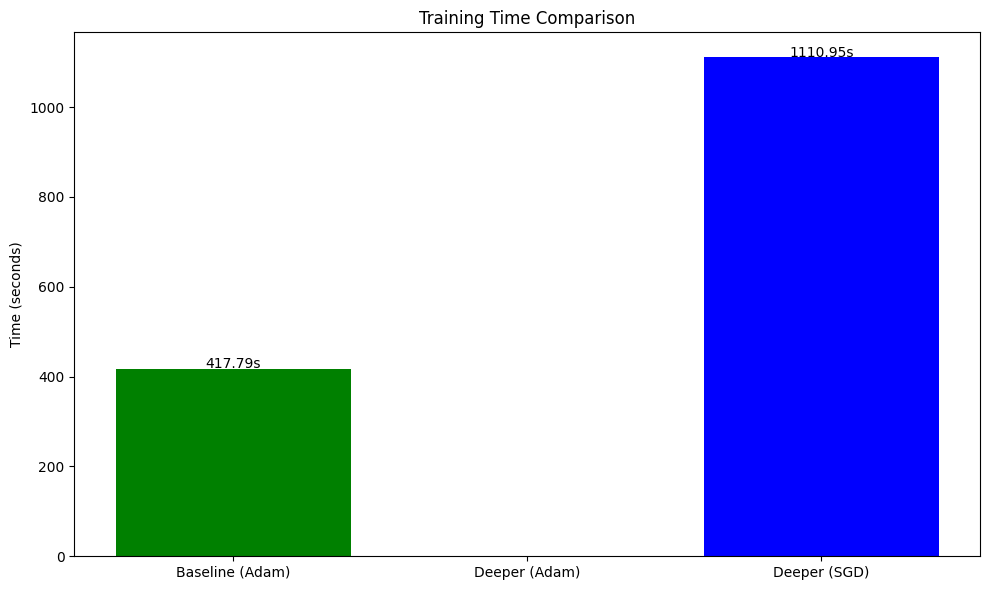

In [94]:
# ---------- Plot Training and Validation Metrics ----------
plt.figure(figsize=(15, 10))

# 1. Training Accuracy
plt.subplot(2, 2, 1)
# Access the dictionary via the .history attribute
plt.plot(history_baseline.history['accuracy'], 'g-', linewidth=2, label='Baseline (Adam)')
plt.plot(history_deeper.history['accuracy'], 'r-', linewidth=2, label='Deeper (Adam)')
plt.plot(history_sgd.history['accuracy'], 'b-', linewidth=2, label='Deeper (SGD)')
plt.title('Training Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# 2. Validation Accuracy
plt.subplot(2, 2, 2)
# Access the dictionary via the .history attribute
plt.plot(history_baseline.history['val_accuracy'], 'g-', linewidth=2, label='Baseline (Adam)')
plt.plot(history_deeper.history['val_accuracy'], 'r-', linewidth=2, label='Deeper (Adam)')
plt.plot(history_sgd.history['val_accuracy'], 'b-', linewidth=2, label='Deeper (SGD)')
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# 3. Training Loss
plt.subplot(2, 2, 3)
# Access the dictionary via the .history attribute
plt.plot(history_baseline.history['loss'], 'g-', linewidth=2, label='Baseline (Adam)')
plt.plot(history_deeper.history['loss'], 'r-', linewidth=2, label='Deeper (Adam)')
plt.plot(history_sgd.history['loss'], 'b-', linewidth=2, label='Deeper (SGD)')
plt.title('Training Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

# 4. Validation Loss
plt.subplot(2, 2, 4)
# Access the dictionary via the .history attribute
plt.plot(history_baseline.history['val_loss'], 'g-', linewidth=2, label='Baseline (Adam)')
plt.plot(history_deeper.history['val_loss'], 'r-', linewidth=2, label='Deeper (Adam)')
plt.plot(history_sgd.history['val_loss'], 'b-', linewidth=2, label='Deeper (SGD)')
plt.title('Validation Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()

# ---------- Evaluate all models on test data ----------
# Ensure models are loaded and compiled before evaluation
try:
    baseline_model = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_baseline_model.h5')
    baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    deeper_model = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model.h5')
    deeper_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    deeper_model_sgd = load_model('/content/drive/MyDrive/ai ml/Assignment_1/Dipendra_deeper_model_sgd.h5')
    deeper_model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                             loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    baseline_results = baseline_model.evaluate(test_ds, verbose=0)
    adam_results = deeper_model.evaluate(test_ds, verbose=0)
    sgd_results = deeper_model_sgd.evaluate(test_ds, verbose=0)

except FileNotFoundError:
     print("Error loading model files. Please ensure they exist.")
     # Handle the error, perhaps by using placeholder results or exiting
     baseline_results = [np.nan, np.nan]
     adam_results = [np.nan, np.nan]
     sgd_results = [np.nan, np.nan]
except Exception as e:
     print(f"An error occurred during model loading or evaluation: {e}")
     baseline_results = [np.nan, np.nan]
     adam_results = [np.nan, np.nan]
     sgd_results = [np.nan, np.nan]


# ---------- Add test metrics below the plots ----------
# Use try-except to handle potential issues if results are np.nan
try:
    plt.figtext(0.5, 0.01,
               f"Baseline (Adam) - Test Loss: {baseline_results[0]:.4f}, Test Accuracy: {baseline_results[1]:.4f}\n"
               f"Deeper (Adam)   - Test Loss: {adam_results[0]:.4f}, Test Accuracy: {adam_results[1]:.4f}\n"
               f"Deeper (SGD)    - Test Loss: {sgd_results[0]:.4f}, Test Accuracy: {sgd_results[1]:.4f}",
               ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
except:
    # Print raw results if formatting fails
    print("\nTest Results:")
    print(f"Baseline (Adam): Loss={baseline_results[0]}, Accuracy={baseline_results[1]}")
    print(f"Deeper (Adam): Loss={adam_results[0]}, Accuracy={adam_results[1]}")
    print(f"Deeper (SGD): Loss={sgd_results[0]}, Accuracy={sgd_results[1]}")


plt.show()

# ---------- Create bar chart: Test Accuracy ----------
plt.figure(figsize=(10, 6))
models = ['Baseline (Adam)', 'Deeper (Adam)', 'Deeper (SGD)']
accuracies = [baseline_results[1], adam_results[1], sgd_results[1]] # Use evaluation results

plt.bar(models, accuracies, color=colors)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add labels on top, handle potential NaN values
for i, acc in enumerate(accuracies):
    if not np.isnan(acc):
         plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
    else:
         plt.text(i, 0.01, 'N/A', ha='center') # Indicate missing data


plt.tight_layout()
plt.show()

# ---------- (Optional) Create bar chart: Training Time ----------
try:
    plt.figure(figsize=(10, 6))
    times = [
        baseline_training_time if 'baseline_training_time' in globals() else 0,
        adam_training_time if 'adam_training_time' in globals() else 0, # Assuming adam_training_time was recorded
        sgd_training_time if 'sgd_training_time' in globals() else 0
    ]

    if sum(times) > 0:
        plt.bar(models, times, color=colors)
        plt.title('Training Time Comparison')
        plt.ylabel('Time (seconds)')

        for i, t in enumerate(times):
            if t > 0:
                plt.text(i, t + 1, f'{t:.2f}s', ha='center')

        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"Could not plot training times: {e}")

#Comparing Adam vs SGD optimized model

Available keys in Adam history: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']
Available keys in SGD history: ['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate']
Adam accuracy (first 5 values): [0.9305305480957031, 0.9785785675048828, 0.9867867827415466, 0.9885885715484619, 0.988988995552063]
Adam accuracy (min, max): 0.9305305480957031 0.9993994235992432
SGD accuracy (first 5 values): [0.919119119644165, 0.9787787795066833, 0.977977991104126, 0.9777777791023254, 0.9913914203643799]
SGD accuracy (min, max): 0.919119119644165 0.9965965747833252
Adam loss (first 5 values): [0.2588745355606079, 0.11388160288333893, 0.09670564532279968, 0.08911414444446564, 0.0837058499455452]
Adam loss (min, max): 0.048429880291223526 0.2588745355606079
SGD loss (first 5 values): [0.28032007813453674, 0.12468713521957397, 0.12120094895362854, 0.12415503710508347, 0.08265422284603119]
SGD loss (min, max): 0.06656961888074875 0.28032007813453674
Adam val_accuracy (first 5 va

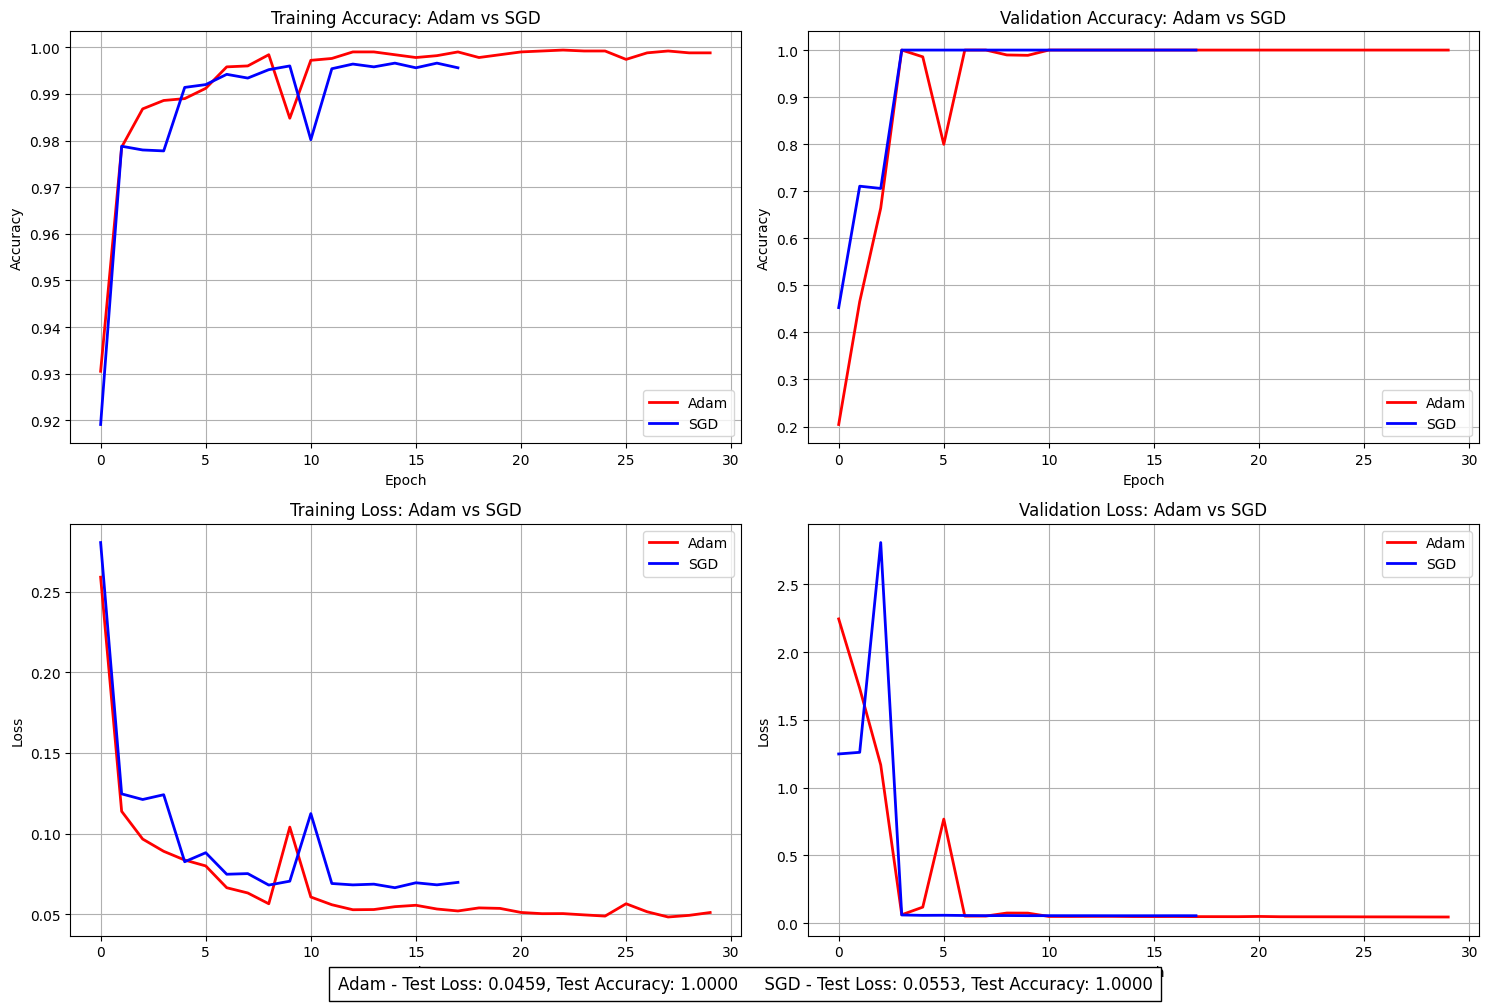

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# DIAGNOSTIC: Print all available keys in both history objects
print("Available keys in Adam history:", list(history.history.keys()))
print("Available keys in SGD history:", list(history_sgd.history.keys()))

# DIAGNOSTIC: Check if data exists and print sample values
for key in ['accuracy', 'loss', 'val_accuracy', 'val_loss']:
    if key in history.history:
        print(f"Adam {key} (first 5 values):", history.history[key][:5])
        print(f"Adam {key} (min, max):", min(history.history[key]), max(history.history[key]))
    else:
        print(f"Adam {key}: Not found")

    if key in history_sgd.history:
        print(f"SGD {key} (first 5 values):", history_sgd.history[key][:5])
        print(f"SGD {key} (min, max):", min(history_sgd.history[key]), max(history_sgd.history[key]))
    else:
        print(f"SGD {key}: Not found")

# SOLUTION ATTEMPT 1: Use extracted data directly
# Create the figure
plt.figure(figsize=(15, 10))

# Try different key variations
adam_train_acc_key = next((k for k in history.history.keys() if 'acc' in k.lower() and not 'val' in k.lower()), None)
adam_val_acc_key = next((k for k in history.history.keys() if 'acc' in k.lower() and 'val' in k.lower()), None)
adam_train_loss_key = next((k for k in history.history.keys() if 'loss' in k.lower() and not 'val' in k.lower()), None)
adam_val_loss_key = next((k for k in history.history.keys() if 'loss' in k.lower() and 'val' in k.lower()), None)

sgd_train_acc_key = next((k for k in history_sgd.history.keys() if 'acc' in k.lower() and not 'val' in k.lower()), None)
sgd_val_acc_key = next((k for k in history_sgd.history.keys() if 'acc' in k.lower() and 'val' in k.lower()), None)
sgd_train_loss_key = next((k for k in history_sgd.history.keys() if 'loss' in k.lower() and not 'val' in k.lower()), None)
sgd_val_loss_key = next((k for k in history_sgd.history.keys() if 'loss' in k.lower() and 'val' in k.lower()), None)

print("Found keys:")
print(f"Adam: {adam_train_acc_key}, {adam_val_acc_key}, {adam_train_loss_key}, {adam_val_loss_key}")
print(f"SGD: {sgd_train_acc_key}, {sgd_val_acc_key}, {sgd_train_loss_key}, {sgd_val_loss_key}")

# 1. Training Accuracy
plt.subplot(2, 2, 1)
if adam_train_acc_key:
    plt.plot(history.history[adam_train_acc_key], 'r-', linewidth=2, label='Adam')
if sgd_train_acc_key:
    plt.plot(history_sgd.history[sgd_train_acc_key], 'b-', linewidth=2, label='SGD')
plt.title('Training Accuracy: Adam vs SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
# No y-axis limits to ensure all data is visible

# 2. Validation Accuracy
plt.subplot(2, 2, 2)
if adam_val_acc_key:
    plt.plot(history.history[adam_val_acc_key], 'r-', linewidth=2, label='Adam')
if sgd_val_acc_key:
    plt.plot(history_sgd.history[sgd_val_acc_key], 'b-', linewidth=2, label='SGD')
plt.title('Validation Accuracy: Adam vs SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
# No y-axis limits

# 3. Training Loss
plt.subplot(2, 2, 3)
if adam_train_loss_key:
    plt.plot(history.history[adam_train_loss_key], 'r-', linewidth=2, label='Adam')
if sgd_train_loss_key:
    plt.plot(history_sgd.history[sgd_train_loss_key], 'b-', linewidth=2, label='SGD')
plt.title('Training Loss: Adam vs SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
# No y-axis limits

# 4. Validation Loss
plt.subplot(2, 2, 4)
if adam_val_loss_key:
    plt.plot(history.history[adam_val_loss_key], 'r-', linewidth=2, label='Adam')
if sgd_val_loss_key:
    plt.plot(history_sgd.history[sgd_val_loss_key], 'b-', linewidth=2, label='SGD')
plt.title('Validation Loss: Adam vs SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
# No y-axis limits

plt.tight_layout()

# Add test metrics
plt.figtext(0.5, 0.005,
          f"Adam - Test Loss: {adam_results[0]:.4f}, Test Accuracy: {adam_results[1]:.4f}     "
          f"SGD - Test Loss: {sgd_results[0]:.4f}, Test Accuracy: {sgd_results[1]:.4f}",
          ha="center", fontsize=12,
          bbox={"facecolor":"white", "alpha":1.0, "pad":6})

plt.show()




#Exercise 3.1.4

Experimentation and Comparative Analysis fo Deeper and Baseline models

In [ ]:
#Baseline vs Deeper model performance



#part B

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
# Define image dimensions required by VGG16
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load datasets with proper image size for transfer learning
train_ds_tl = image_dataset_from_directory(
    '/content/drive/MyDrive/ai ml/Fruit Classification/Train',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds_tl = image_dataset_from_directory(
    '/content/drive/MyDrive/ai ml/Fruit Classification/Train',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=123
)

test_ds_tl = image_dataset_from_directory(
    '/content/drive/MyDrive/ai ml/Fruit Classification/Test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 6243 files belonging to 5 classes.
Using 4995 files for training.
Found 6243 files belonging to 5 classes.
Using 1248 files for validation.
Found 55 files belonging to 5 classes.


In [79]:
# Cell 3: Data Analysis and Preparation
# Get class names and print dataset information
class_names = train_ds_tl.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")

# Normalize pixel values
normalization_layer = Rescaling(1./255)
train_ds_tl = train_ds_tl.map(lambda x, y: (normalization_layer(x), y))
val_ds_tl = val_ds_tl.map(lambda x, y: (normalization_layer(x), y))
test_ds_tl = test_ds_tl.map(lambda x, y: (normalization_layer(x), y))

# Performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds_tl = train_ds_tl.prefetch(buffer_size=AUTOTUNE)
val_ds_tl = val_ds_tl.prefetch(buffer_size=AUTOTUNE)
test_ds_tl = test_ds_tl.prefetch(buffer_size=AUTOTUNE)


Class names: ['Banana', 'Cherry', 'Grape', 'Mango', 'Peach']
Number of classes: 5


In [80]:
# Cell 4: Feature Extraction Model Building
print("Building the transfer learning model - Feature Extraction Phase...")

# Load VGG16 pre-trained on ImageNet without top layers
base_model = VGG16(include_top=False,
                  weights='imagenet',
                  input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze all layers in the base model (Feature Extraction approach)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
input_layer = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
output = Dense(num_classes, activation='softmax')(x)

# Create the feature extraction model
model_feature_extraction = Model(inputs=input_layer, outputs=output)

# Compile with appropriate loss function and optimizer
model_feature_extraction.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
print("Feature Extraction Model Summary:")
model_feature_extraction.summary()

# Cell 5: Training the Feature Extraction Model
print("\nTraining Feature Extraction Model...")
start_time = time.time()

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history_feature_extraction = model_feature_extraction.fit(
    train_ds_tl,
    validation_data=val_ds_tl,
    epochs=15,
    callbacks=callbacks
)

feature_extraction_time = time.time() - start_time
print(f"Feature extraction training time: {feature_extraction_time:.2f} seconds")

Building the transfer learning model - Feature Extraction Phase...
Feature Extraction Model Summary:


Model: "functional_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 132,613 (518.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training Feature Extraction Model...
Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 249ms/step - accuracy: 0.2769 - loss: 1.6371 - val_accuracy: 0.7572 - val_loss: 1.1922
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 189ms/step - accuracy: 0.5667 - loss: 1.1951 - val_accuracy: 0.8902 - val_loss: 0.9477
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.7297 - loss: 0.9362 - val_accuracy: 0.9335 - val_loss: 0.7807
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 223ms/step - accuracy: 0.8267 - loss: 0.7780 - val_accuracy: 0.9431 - val_loss: 0.6542
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.8645 - loss: 0.6601 - val_accuracy: 0.9447 - val_loss: 0.5569
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 227ms/step - accuracy: 0.8962 - loss: 0.5656 - val_accuracy: 0.9543 - val_loss: 0.4744
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9108 - loss: 0.4951 - val_accuracy: 0.9583 - val_loss: 0.4076
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 2

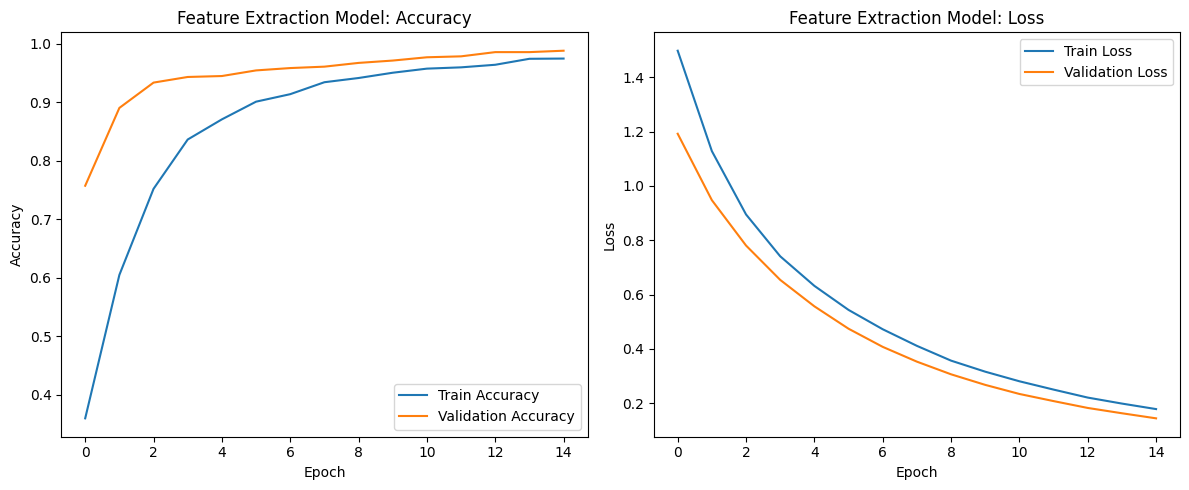

In [81]:
# Plot training history for feature extraction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_feature_extraction.history['accuracy'], label='Train Accuracy')
plt.plot(history_feature_extraction.history['val_accuracy'], label='Validation Accuracy')
plt.title('Feature Extraction Model: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_feature_extraction.history['loss'], label='Train Loss')
plt.plot(history_feature_extraction.history['val_loss'], label='Validation Loss')
plt.title('Feature Extraction Model: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('feature_extraction_training.png')
plt.show()


In [82]:
# Evaluate Feature Extraction Model
feature_extraction_results = model_feature_extraction.evaluate(test_ds_tl)
print(f"Feature Extraction Model - Test Loss: {feature_extraction_results[0]:.4f}, Test Accuracy: {feature_extraction_results[1]:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step - accuracy: 0.7261 - loss: 0.8451
Feature Extraction Model - Test Loss: 0.8005, Test Accuracy: 0.7455


In [83]:
print("\nImplementing Fine-Tuning Phase...")

# Create a new model for fine-tuning
base_model_ft = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# First, freeze all layers
for layer in base_model_ft.layers:
    layer.trainable = False

# Then, unfreeze the last convolutional block for fine-tuning
# VGG16's last convolutional block starts at 'block5_conv1'
fine_tune_at = 15  # This will unfreeze the last convolutional block
for layer in base_model_ft.layers[fine_tune_at:]:
    layer.trainable = True

# Add custom classification head (same as before)
input_layer_ft = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x_ft = base_model_ft(input_layer_ft)
x_ft = GlobalAveragePooling2D()(x_ft)
x_ft = Dense(256, activation='relu')(x_ft)
x_ft = Dropout(0.5)(x_ft)  # Add dropout for regularization
output_ft = Dense(num_classes, activation='softmax')(x_ft)

# Create the fine-tuning model
model_fine_tuning = Model(inputs=input_layer_ft, outputs=output_ft)

# Compile with a LOWER learning rate for fine-tuning
model_fine_tuning.compile(
    optimizer=Adam(learning_rate=0.00001),  # 10x lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
print("Fine-tuned Model Summary (Note trainable parameters):")
model_fine_tuning.summary()


Implementing Fine-Tuning Phase...
Fine-tuned Model Summary (Note trainable parameters):


Model: "functional_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,301 (56.64 MB)

 Trainable params: 7,212,037 (27.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [84]:
print("\nTraining Fine-tuned Model...")
start_time_ft = time.time()

# Train the fine-tuned model
history_fine_tuning = model_fine_tuning.fit(
    train_ds_tl,
    validation_data=val_ds_tl,
    epochs=10,
    callbacks=callbacks
)

fine_tuning_time = time.time() - start_time_ft
print(f"Fine-tuning training time: {fine_tuning_time:.2f} seconds")


Training Fine-tuned Model...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - accuracy: 0.4161 - loss: 1.4017 - val_accuracy: 0.9872 - val_loss: 0.2530
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 226ms/step - accuracy: 0.9543 - loss: 0.2146 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.9967 - loss: 0.0377 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.9997 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 6.1985e-04
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 228ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 6.4405e-04
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 2

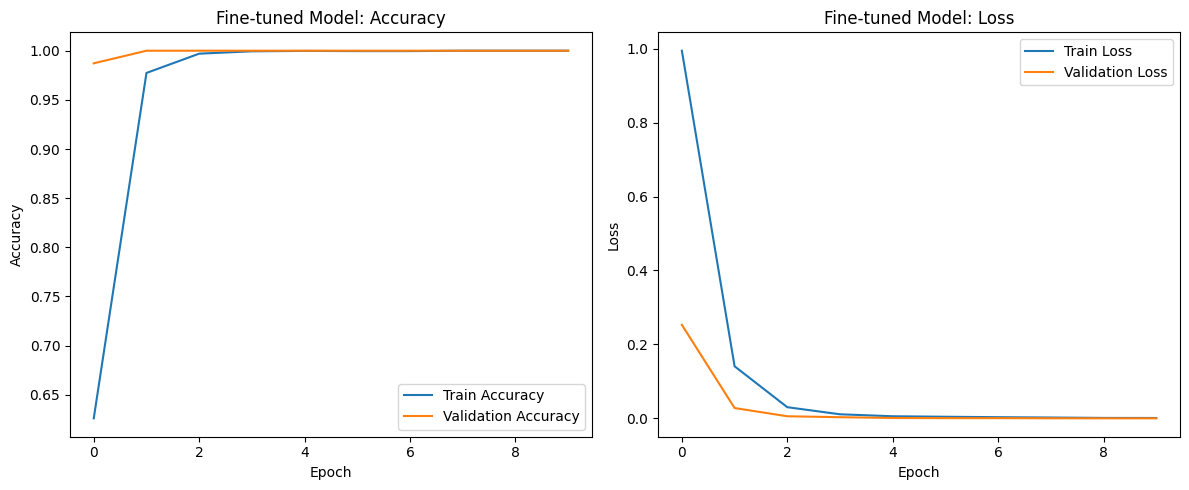

In [85]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tuning.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-tuned Model: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tuning.history['loss'], label='Train Loss')
plt.plot(history_fine_tuning.history['val_loss'], label='Validation Loss')
plt.title('Fine-tuned Model: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('fine_tuning_training.png')
plt.show()


In [86]:
# Evaluate Fine-tuned Model
fine_tuning_results = model_fine_tuning.evaluate(test_ds_tl)
print(f"Fine-tuned Model - Test Loss: {fine_tuning_results[0]:.4f}, Test Accuracy: {fine_tuning_results[1]:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.7348 - loss: 0.8217
Fine-tuned Model - Test Loss: 0.8366, Test Accuracy: 0.7273


In [87]:
def evaluate_detailed(model, dataset, class_names):
    # Predict on test data
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_classes)

    # Generate classification report
    report = classification_report(all_labels, all_predictions, target_names=class_names, digits=4)

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    return report, cm

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step

Detailed Classification Report:
              precision    recall  f1-score   support

      Banana     0.6250    0.9091    0.7407        11
      Cherry     0.7333    1.0000    0.8462        11
       Grape     0.7333    1.0000    0.8462        11
       Mango     1.0000    0.4545    0.6250        11
       Peach     0.7500    0.2727    0.4000        11

    accuracy                         0.7273        55
   macro avg     0.7683    0.7273    0.6916        55
weighted avg     0.7683    0.7273    0.6916        55



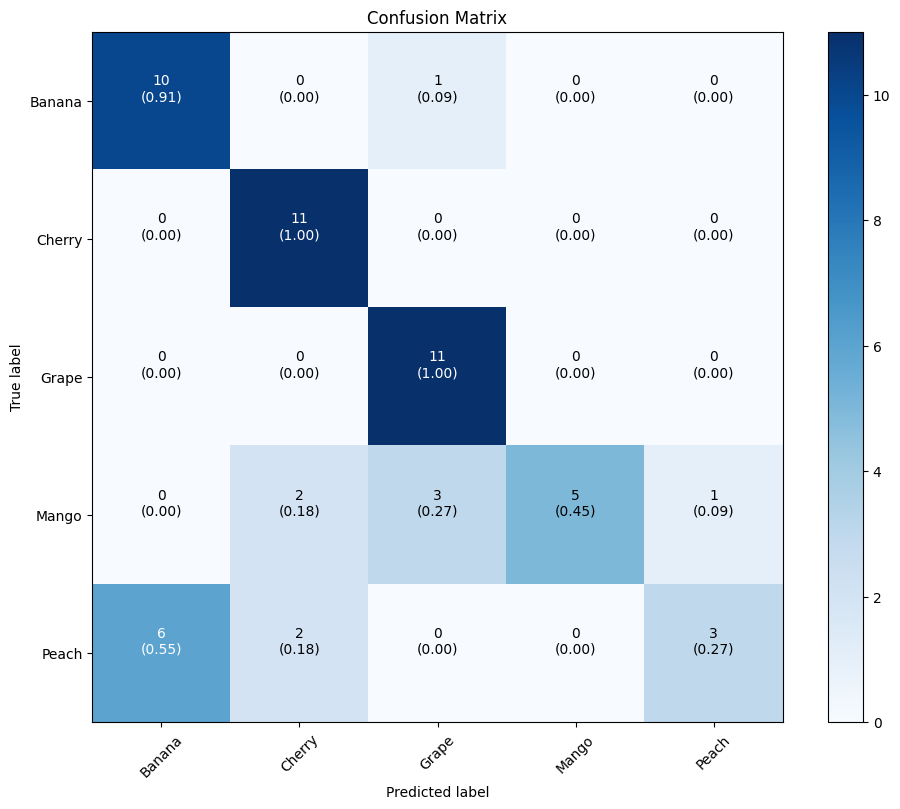

In [88]:
# Get detailed metrics for fine-tuned model (which should perform better)
detailed_report, confusion_mat = evaluate_detailed(model_fine_tuning, test_ds_tl, class_names)
print("\nDetailed Classification Report:")
print(detailed_report)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add normalized values to the confusion matrix
cm_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
thresh = cm_normalized.max() / 2
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, f"{confusion_mat[i, j]}\n({cm_normalized[i, j]:.2f})",
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


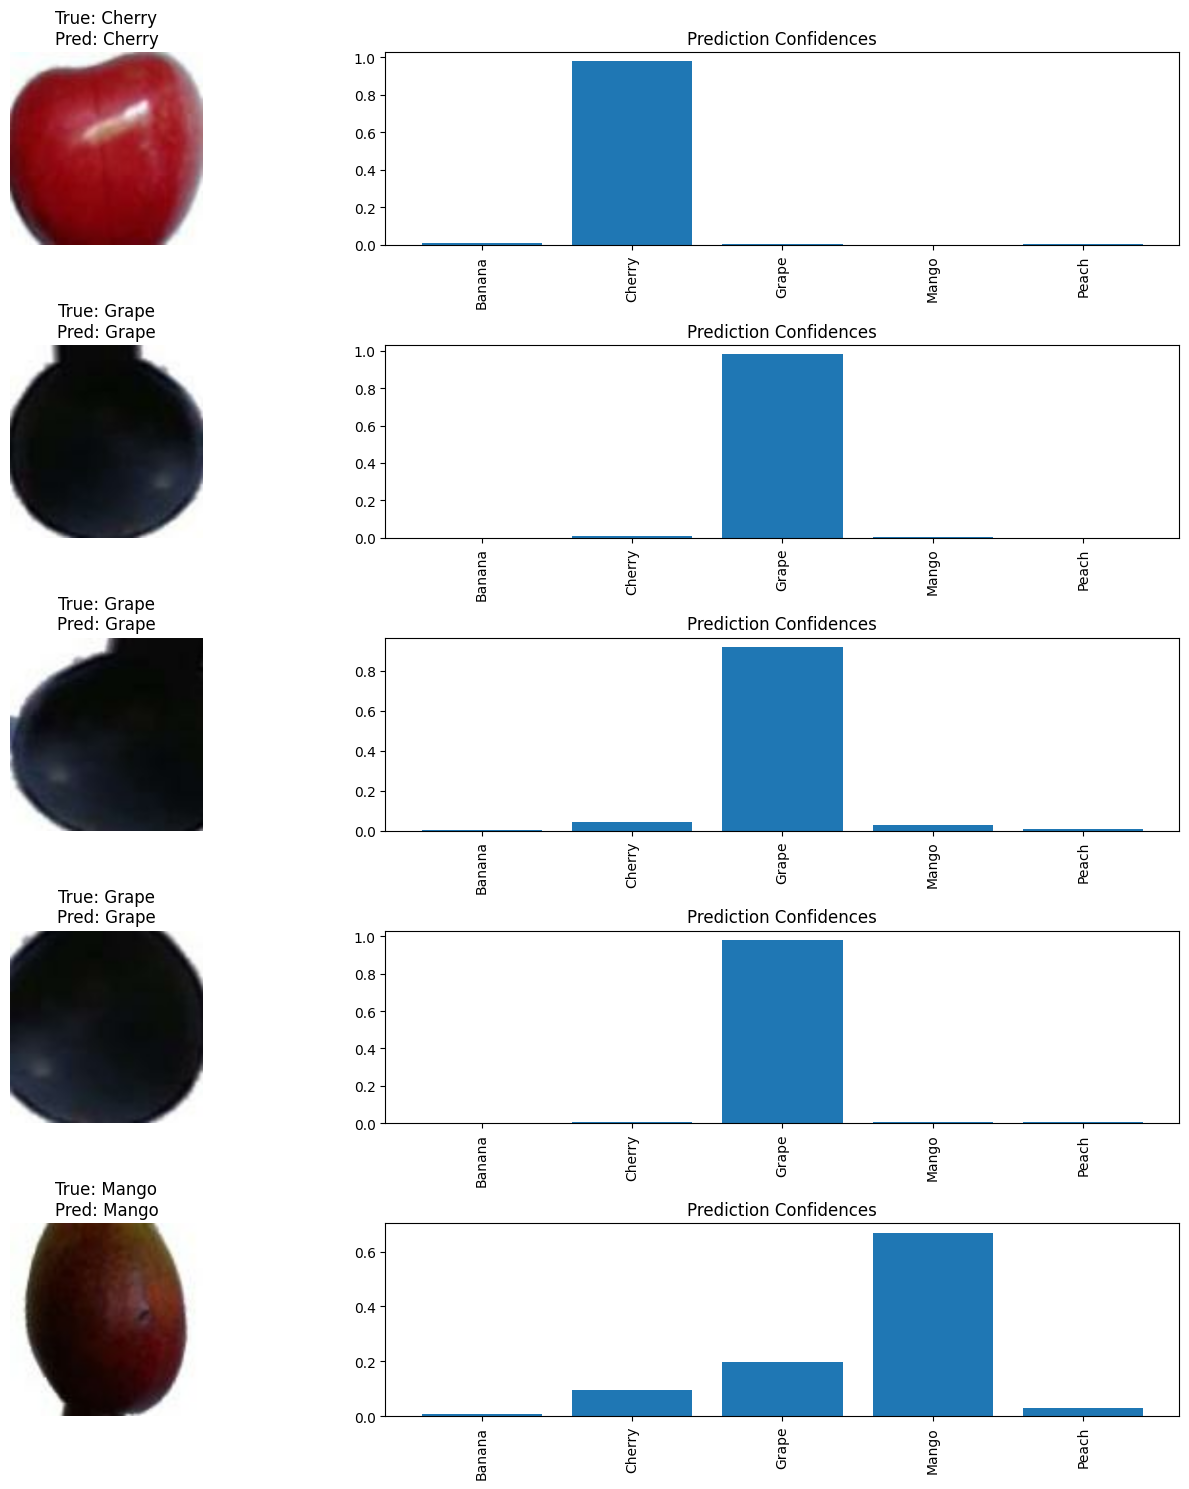

In [66]:
def show_predictions(model, dataset, class_names, num_images=5):
    plt.figure(figsize=(15, 3*num_images))

    for images, labels in dataset.take(1):  # Take just one batch
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)

        for i in range(min(num_images, len(images))):
            plt.subplot(num_images, 2, 2*i+1)
            plt.imshow(images[i].numpy())
            plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
            plt.axis('off')

            plt.subplot(num_images, 2, 2*i+2)
            plt.bar(range(len(class_names)), predictions[i])
            plt.xticks(range(len(class_names)), class_names, rotation=90)
            plt.title('Prediction Confidences')

        break  # Just use the first batch

    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Show sample predictions
show_predictions(model_fine_tuning, test_ds_tl, class_names)

In [67]:
# Replace these placeholders with your actual Part A results
baseline_accuracy = 0.0  # Replace with your Part A baseline accuracy
deeper_accuracy = 0.0    # Replace with your Part A deeper model accuracy
baseline_time = 0.0      # Replace with your Part A baseline training time
deeper_time = 0.0        # Replace with your Part A deeper model training time

print("\nModel Comparison Summary:")
print("------------------------")
print(f"Fine-tuned VGG16 Model Accuracy: {fine_tuning_results[1]:.4f}")
print(f"Feature Extraction VGG16 Model Accuracy: {feature_extraction_results[1]:.4f}")
print(f"Part A Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Part A Deeper Model Accuracy: {deeper_accuracy:.4f}")
print("\nTraining Time Comparison:")
print(f"Fine-tuning Training Time: {fine_tuning_time:.2f} seconds")
print(f"Feature Extraction Training Time: {feature_extraction_time:.2f} seconds")
print(f"Part A Baseline Training Time: {baseline_time:.2f} seconds")
print(f"Part A Deeper Model Training Time: {deeper_time:.2f} seconds")

# Optional Cell 16: Save the fine-tuned model for future use
model_fine_tuning.save('vgg16_fine_tuned_model.h5')
print("Fine-tuned model saved as 'vgg16_fine_tuned_model.h5'")



Model Comparison Summary:
------------------------
Fine-tuned VGG16 Model Accuracy: 0.7273
Feature Extraction VGG16 Model Accuracy: 0.7818
Part A Baseline Model Accuracy: 0.0000
Part A Deeper Model Accuracy: 0.0000

Training Time Comparison:
Fine-tuning Training Time: 208.49 seconds
Feature Extraction Training Time: 494.72 seconds
Part A Baseline Training Time: 0.00 seconds
Part A Deeper Model Training Time: 0.00 seconds
Fine-tuned model saved as 'vgg16_fine_tuned_model.h5'
